In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training
test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X.Shape:",X_test.shape, "Y.Shape:", Y_test.shape)

X.Shape: (10, 5, 1) Y.Shape: (10,)


In [9]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [10]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((70), batch_input_shape=(None,5,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation='relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

W0720 13:31:34.127293  9052 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 70)             20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 288       
Total params: 20,448
Trainable params: 20,448
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(148, 5, 1), y_train, epochs=1000, validation_data=(x_test.reshape(37, 5, 1), y_test))

W0720 13:31:36.186646  9052 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 2s 11ms/sample - loss: 0.6702 - acc: 0.0000e+00 - val_loss: 0.9959 - val_acc: 0.0000e+00
Epoch 2/1000
148/148 [==============================] - 0s 613us/sample - loss: 0.6460 - acc: 0.0000e+00 - val_loss: 0.8486 - val_acc: 0.0000e+00
Epoch 3/1000
148/148 [==============================] - 0s 602us/sample - loss: 0.6242 - acc: 0.0000e+00 - val_loss: 0.6667 - val_acc: 0.0000e+00
Epoch 4/1000
148/148 [==============================] - 0s 628us/sample - loss: 0.5949 - acc: 0.0000e+00 - val_loss: 0.4299 - val_acc: 0.0000e+00
Epoch 5/1000
148/148 [==============================] - 0s 840us/sample - loss: 0.5672 - acc: 0.0000e+00 - val_loss: 0.0698 - val_acc: 0.0000e+00
Epoch 6/1000
148/148 [==============================] - 0s 546us/sample - loss: 0.5549 - acc: 0.0000e+00 - val_loss: 0.0313 - val_acc: 0.0000e+00
Epoch 7/1000
148/148 [==============================] - 0s 586us/sample - loss: 

148/148 [==============================] - 0s 733us/sample - loss: 0.5285 - acc: 0.0000e+00 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 994/1000
148/148 [==============================] - 0s 625us/sample - loss: 0.5285 - acc: 0.0000e+00 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 995/1000
148/148 [==============================] - 0s 566us/sample - loss: 0.5288 - acc: 0.0000e+00 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 996/1000
148/148 [==============================] - 0s 611us/sample - loss: 0.5289 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 997/1000
148/148 [==============================] - 0s 546us/sample - loss: 0.5293 - acc: 0.0000e+00 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 998/1000
148/148 [==============================] - 0s 561us/sample - loss: 0.5298 - acc: 0.0000e+00 - val_loss: 0.0140 - val_acc: 0.0000e+00
Epoch 999/1000
148/148 [==============================] - 0s 539us/sample - loss: 0.5303 - acc: 0.0000e+00 - val_loss: 0.0173 -

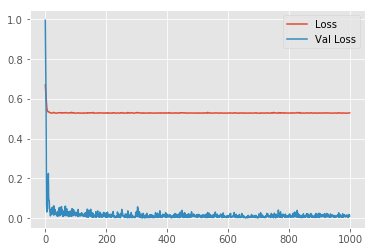

In [13]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [14]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))


In [15]:
# reversing predicted y_test values and rounding up 

scaler.inverse_transform(result).flatten()

array([153.63426, 154.64531, 155.65565, 156.66527, 157.67407, 158.68207,
       159.68913, 160.69527, 161.70041, 162.70453, 163.70752, 164.70938,
       165.71005, 166.70949, 167.70763, 168.70442, 169.69983, 170.69377,
       171.68623, 172.67715, 173.66646, 174.65414, 175.6401 , 176.62436,
       177.60681, 178.58743, 179.56616, 180.54295, 181.51776, 182.49055,
       183.46127, 184.42986, 185.3963 , 186.36052, 187.32251, 188.2822 ,
       189.23953], dtype=float32)

In [28]:
# adjusting predicited y_test values by rounding and subtracting 0.2  

np.round(scaler.inverse_transform(result).flatten()-.2)

array([153., 154., 155., 156., 157., 158., 159., 160., 162., 163., 164.,
       165., 166., 167., 168., 169., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [17]:
# look into original y_test values

scaler.inverse_transform(y_test).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

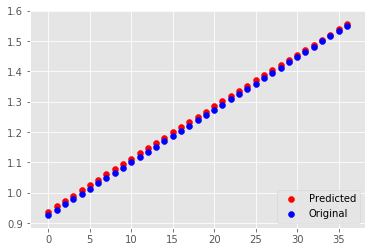

In [18]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

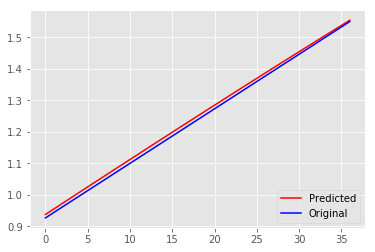

In [19]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [21]:
result_01

array([1.570895 , 1.5873939, 1.6038504, 1.6202633, 1.6366323, 1.6529572,
       1.6692367, 1.6854703, 1.7016574, 1.7177974], dtype=float32)

In [24]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [25]:
# look into original y_test values

scaler.inverse_transform(Y_test).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])